<a href="https://colab.research.google.com/github/AnupreetDubeIITJ/MBA-Proj/blob/main/AnupreetFinalCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Anupreet's MBA Project*** ❤







# **About the dataset:**

## 11 columns
* String 5
* Integer 5
* Id 1

## Features:

* **s.no :** Simply, the Index!
* **age :** Age of the customer.
* **division_name :** Division of the Cloth customer has bought
  1. General
  2. general petites
  3. Initmates
* **department_name :** Department of the Cloth
    1. Bottoms
    2. dresses
    3. intimate
    4. jackets
    5. tops
    6. trends
* **class_name :** Class of the Cloth in particular.
    1. Knits 
    2. Blouses 
    3. Sweaters 
    4. Outerwear 
    5. Dresses 
    6. Swim 
    7. Skirts 
    8. Lounge 
    9. Blouses 
    10. Fine gauge
    11. trend
    12. jeans
    13. casual bottoms
    14. chemises
    15. intimates
    16. pants
    17. tops
    18. jackets
    19. layering
    20. legwear
    21. sleep
* **clothing_id :** Clothing ID (Unique to a type of product)
    1 to 1205
* **title :** Title customers write on their feedback/review text
* **review_text :** Customer's Review Text
* **alikefeedbackcount :** Number of other customers who agrees with the given feedback (as their - experience is quite the same)
* **rating :** Rating or stars they've given to the product
    1 to 5
* **recommend_index :** Whether they'll recommend someone to buy the product or not (0: NO, 1:YES)


In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
color1 = ['#001253','#E14D2A'] #red, blue

In [3]:
#Upload File
from google.colab import files
dataset= files.upload()

Saving AnupreetFinalDataset.csv to AnupreetFinalDataset.csv


In [4]:
df = pd.read_csv('AnupreetFinalDataset.csv')
df.head(3)

,s.no,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index
0,0,40,General,Bottoms,Jeans,1028,Amazing fit and wash,Like other reviewers i was hesitant to spend t...,0,5,1
1,1,62,General Petite,Tops,Blouses,850,Lovely and unique!,As is true of a bunch of the fall clothing pho...,12,5,1
2,2,47,General Petite,Bottoms,Skirts,993,Meh,"I so wanted this skirt to work, love the desig...",3,1,0


In [5]:
print("Size of the dataset:", df.shape)
print(df.duplicated().sum()) #Find duplicates

#Interospecting the columns 
tabel = pd.DataFrame({
    'Unique':df.nunique(), #unique vals in each column
    'Null':df.isna().sum(), #total nulls in each column
    'NullPercent':df.isna().sum() / len(df),
    'Type':df.dtypes.values #data type in each column
})
display(tabel)

Size of the dataset: (23486, 11)
0


,Unique,Null,NullPercent,Type
s.no,23486,0,0.000000,int64
age,77,0,0.000000,int64
division_name,3,14,0.000596,object
department_name,6,14,0.000596,object
class_name,20,14,0.000596,object
clothing_id,1206,0,0.000000,int64
title,13993,3810,0.162224,object
review_text,22634,845,0.035979,object
alike_feedback_count,82,0,0.000000,int64
rating,5,0,0.000000,int64


In [6]:
#To drop NA values and S.No. Column --> Run only once
df.dropna(inplace=True)
df.drop('s.no',axis=1,inplace=True)
print('ok')

ok


#**✅ 1. NLP and DV**

## Most Common Feedback

In [7]:
df['alike_feedback_count'].max() #finding which feedback was most common and counting its freq

122

In [8]:
df[df['alike_feedback_count'] == 122] #feedback type which was most common

,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index
3329,34,General,Dresses,Dresses,1092,Beware if you're fuller in the chest,I loved the lace detailing all over this dress...,122,3,1


## Number of reviews for each division of clothing line

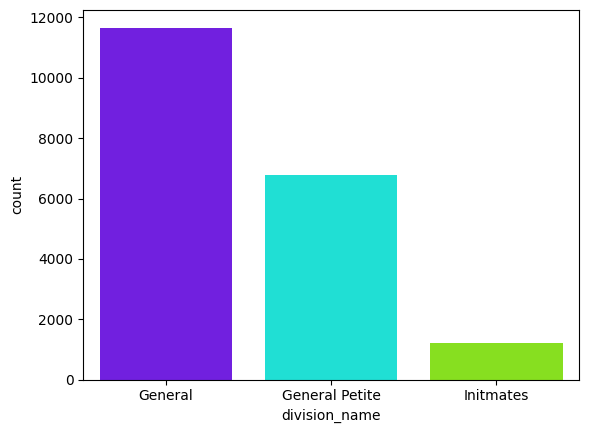

In [9]:
sns.countplot(x=df['division_name'], order=df['division_name'].value_counts().index,palette='hsv_r')
plt.yticks(fontsize=10)
plt.show()

## Number of reviews for each type (department) of cloth 

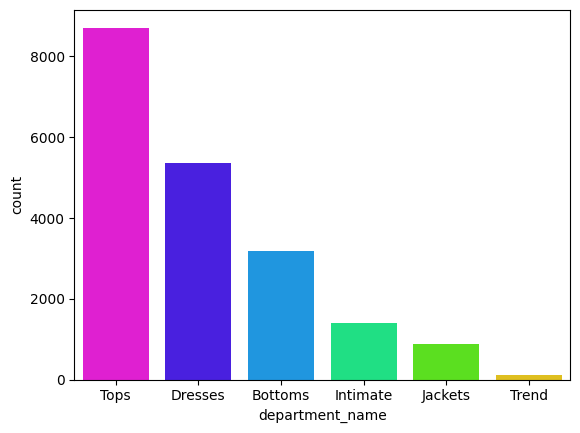

In [10]:
sns.countplot(x=df['department_name'], order=df['department_name'].value_counts().index,palette='hsv_r')
plt.yticks(fontsize=10)
plt.show()

## Number of reviews for each type of product of each department

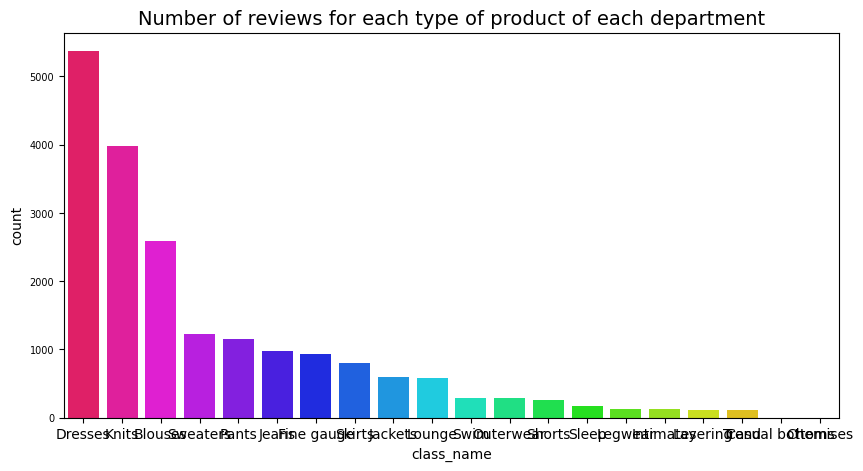

In [11]:
plt.figure(figsize=(10,5))
plt.title('Number of reviews for each type of product of each department', fontsize=14)
sns.countplot(x=df['class_name'], order=df['class_name'].value_counts().index,palette='hsv_r')
plt.yticks(fontsize=7)
plt.show()

## Frequency of each rating recieved by each department

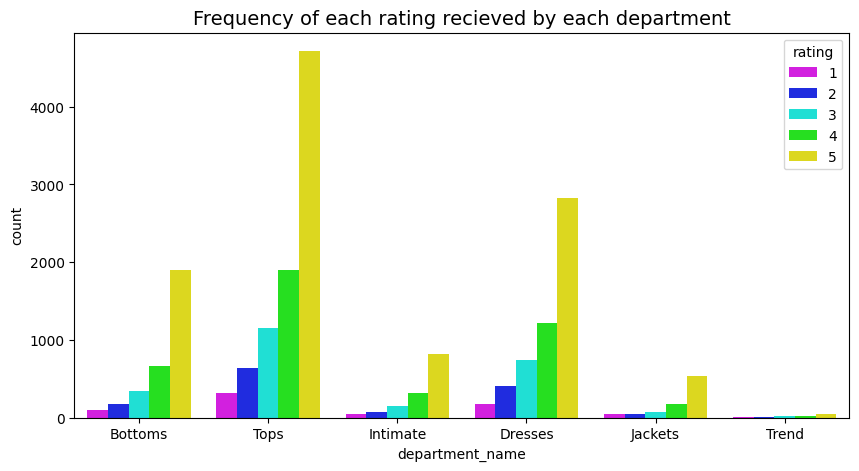

In [12]:
plt.figure(figsize=(10,5))
plt.title('Frequency of each rating recieved by each department', fontsize=14)
sns.countplot(x=df['department_name'], hue=df['rating'], palette='hsv_r')
plt.xticks(fontsize=10)
plt.show()

## Recomendation (rebuy) recieved per department

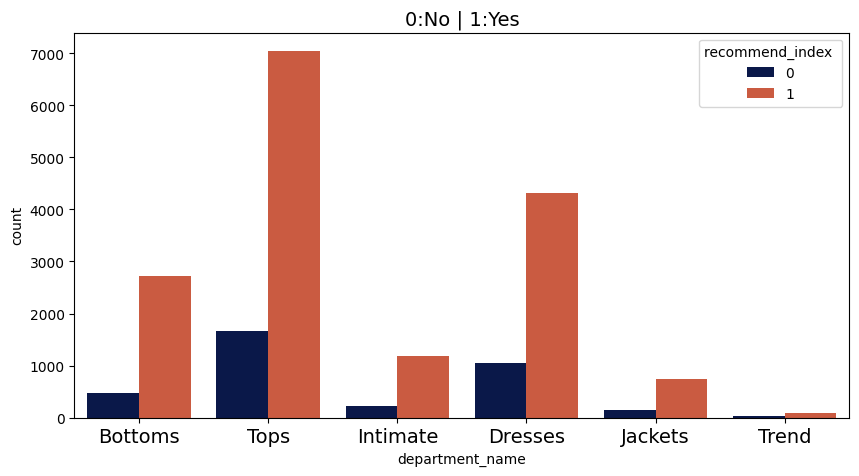

In [13]:
plt.figure(figsize=(10,5))
plt.title('0:No | 1:Yes', fontsize=14)
sns.countplot(x=df['department_name'], hue=df['recommend_index '], palette=color1)
plt.title('0:No | 1:Yes', fontsize=14)
plt.xticks(fontsize=14)
plt.show()

## Ratings per product




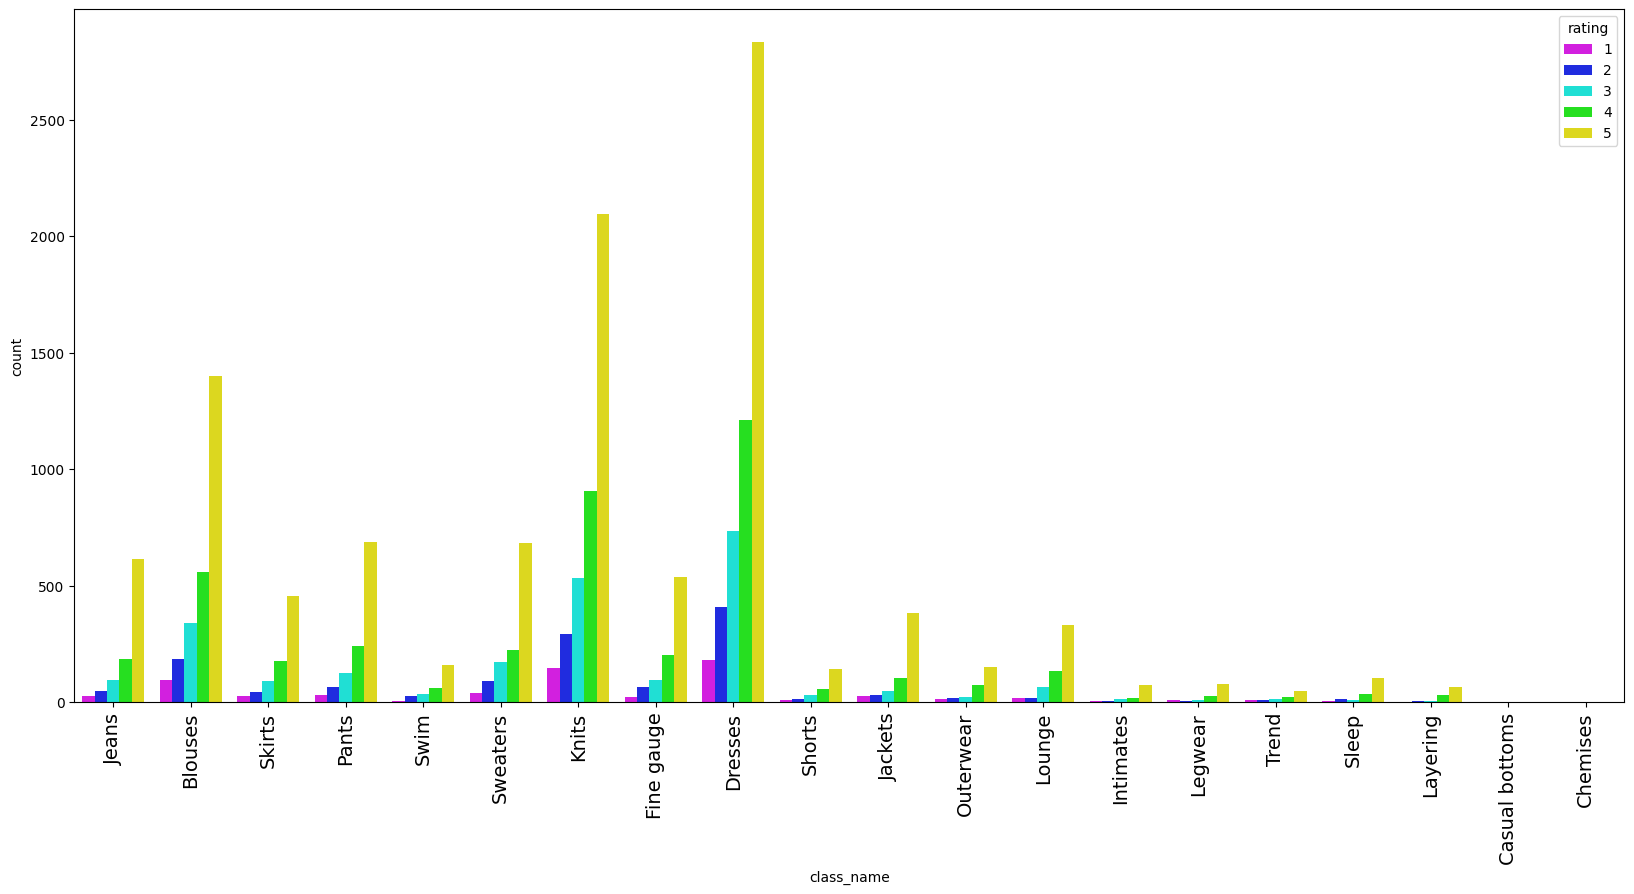

In [14]:
plt.figure(figsize=(20,9))
sns.countplot(x=df['class_name'], hue=df['rating'], palette='hsv_r')
plt.xticks(rotation=90, fontsize=14)
plt.show()

## Recommendation by type of product

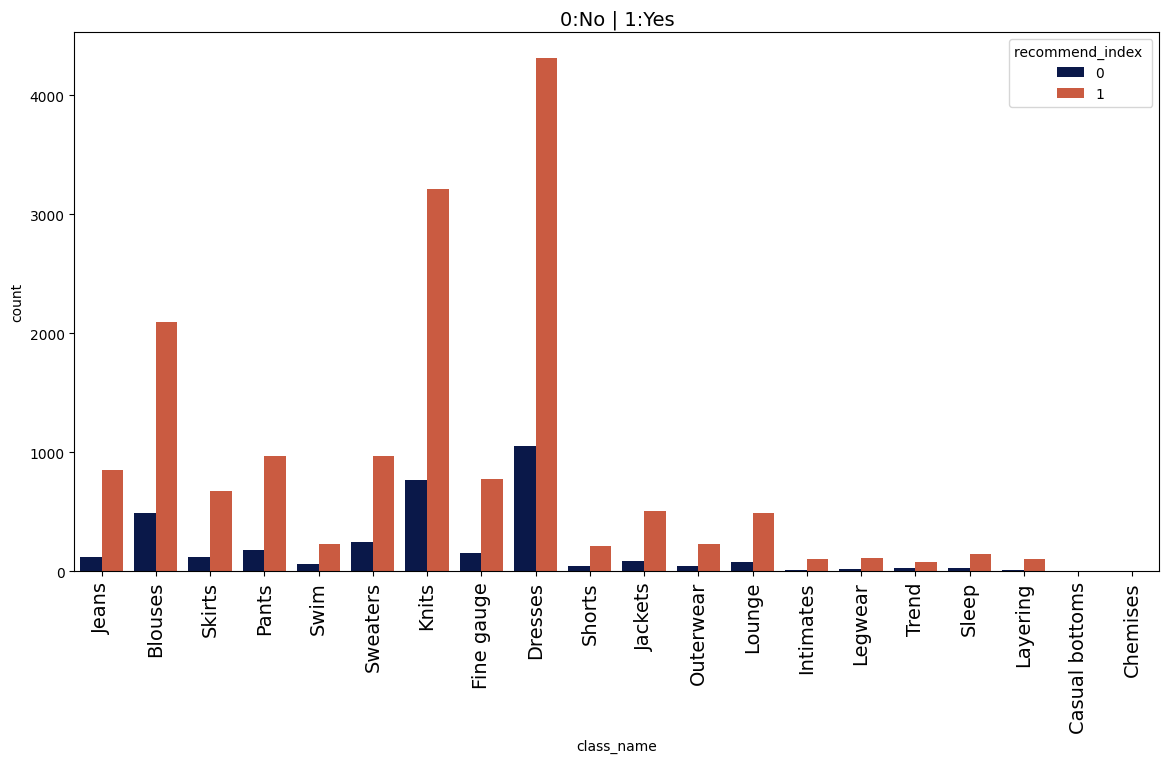

In [15]:
# how many departments were recommended as great
plt.figure(figsize=(14,7))
sns.countplot(x=df['class_name'], hue=df['recommend_index '], palette=color1)
plt.title('0:No | 1:Yes', fontsize=14)
plt.xticks(rotation=90, fontsize=14)
plt.show()

## Classification by age

<Axes: xlabel='age', ylabel='Count'>

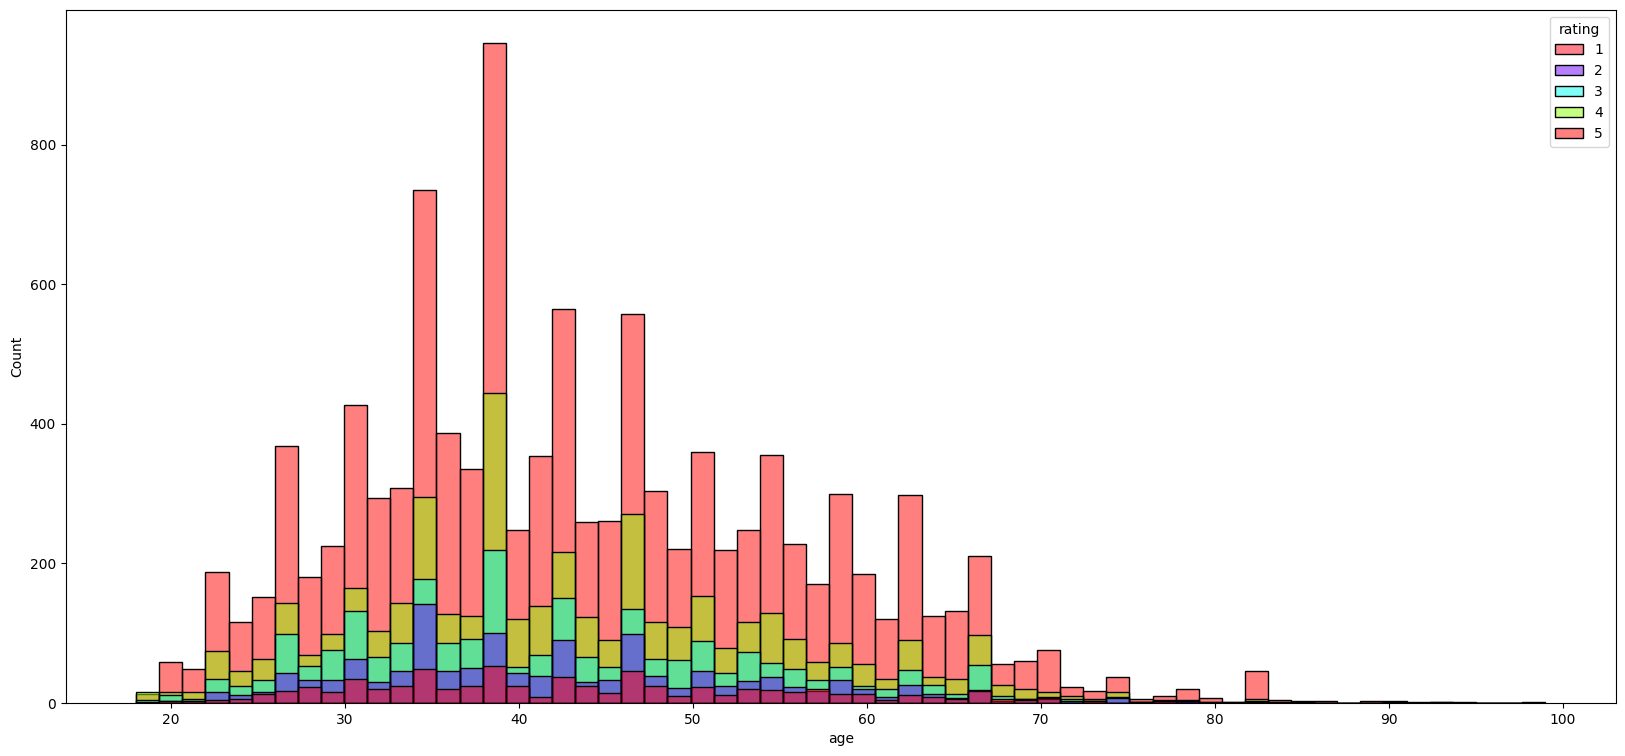

In [16]:
plt.figure(figsize=(20,9))
sns.histplot(x=df['age'], hue=df['rating'], palette='hsv_r')

## Most frequent product code

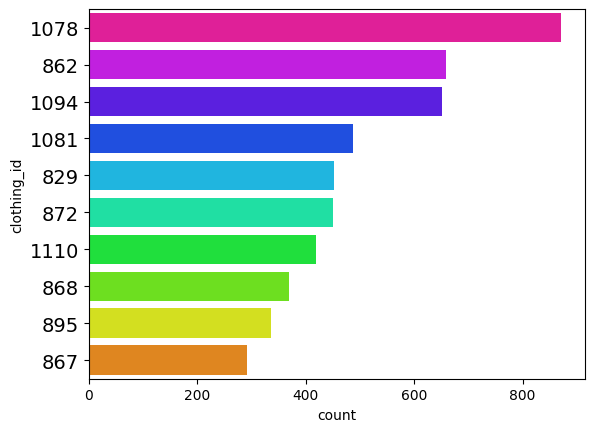

In [17]:
sns.countplot(y=df['clothing_id'], order=df['clothing_id'].value_counts().index[0:10],palette='hsv_r')
plt.yticks(fontsize=14)
plt.show()

## Rating vs Recommendation

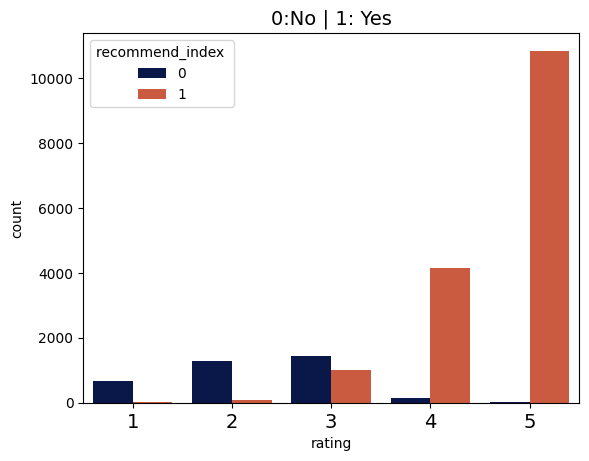

In [18]:
sns.countplot(x=df['rating'], hue=df['recommend_index '], palette=color1)
plt.title('0:No | 1: Yes', fontsize=14)
plt.xticks(fontsize=14)
plt.show()

## frequency of each rating per product

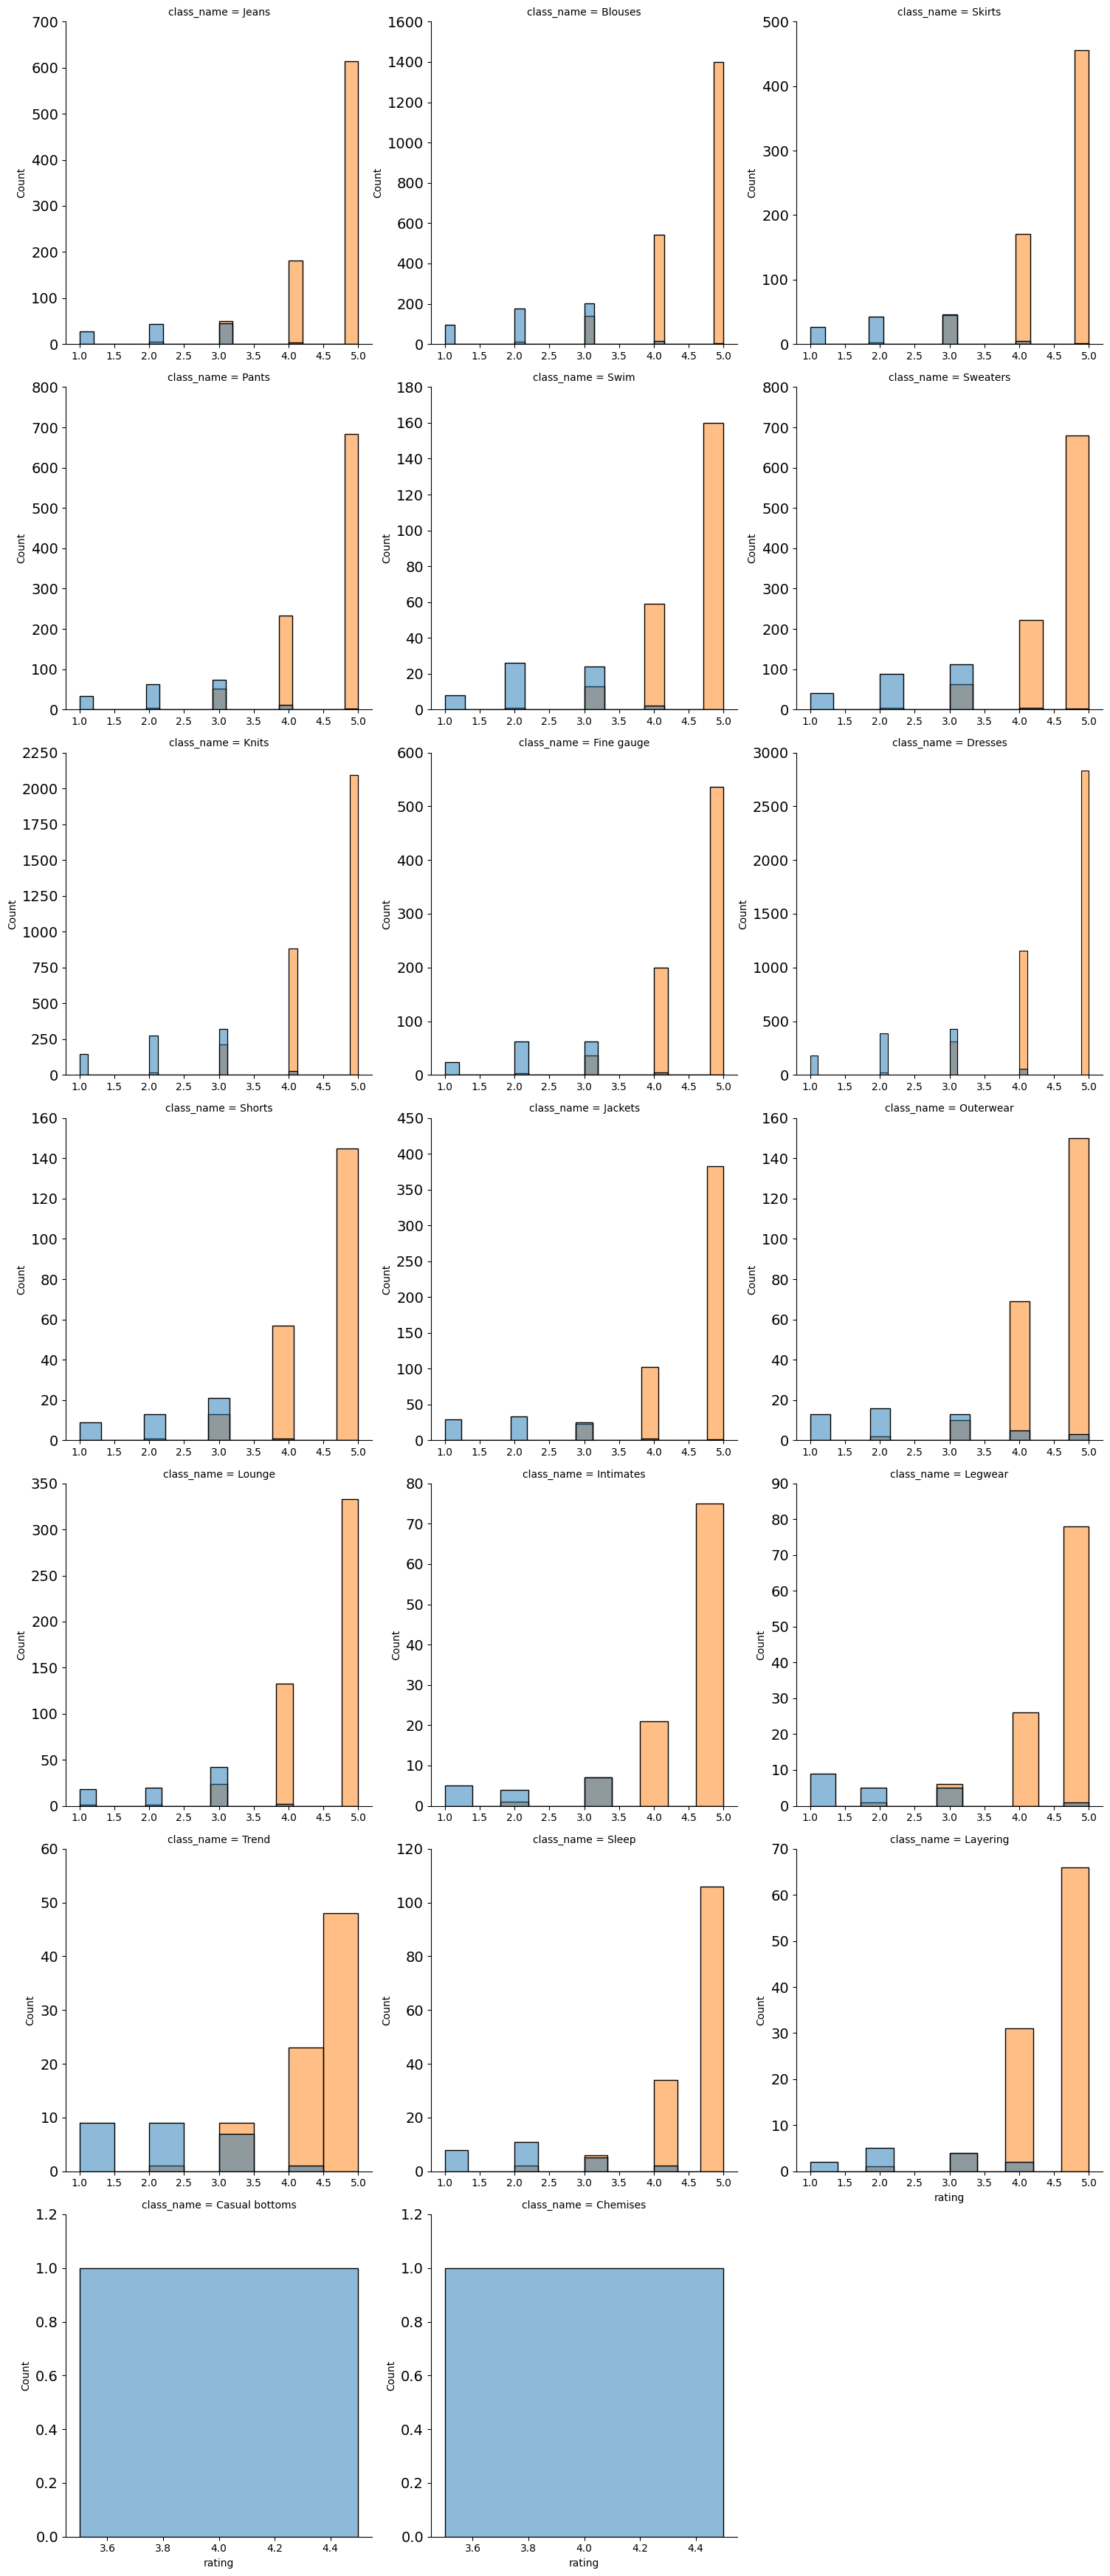

In [19]:
# color -> blue:No, beige:Yes
g = sns.FacetGrid(df, col='class_name', height=5, col_wrap=3, sharex=False,sharey=False)
g.map_dataframe(sns.histplot, x='rating', hue='recommend_index ')
g.set_yticklabels(fontsize=14)

## Products sorted by age

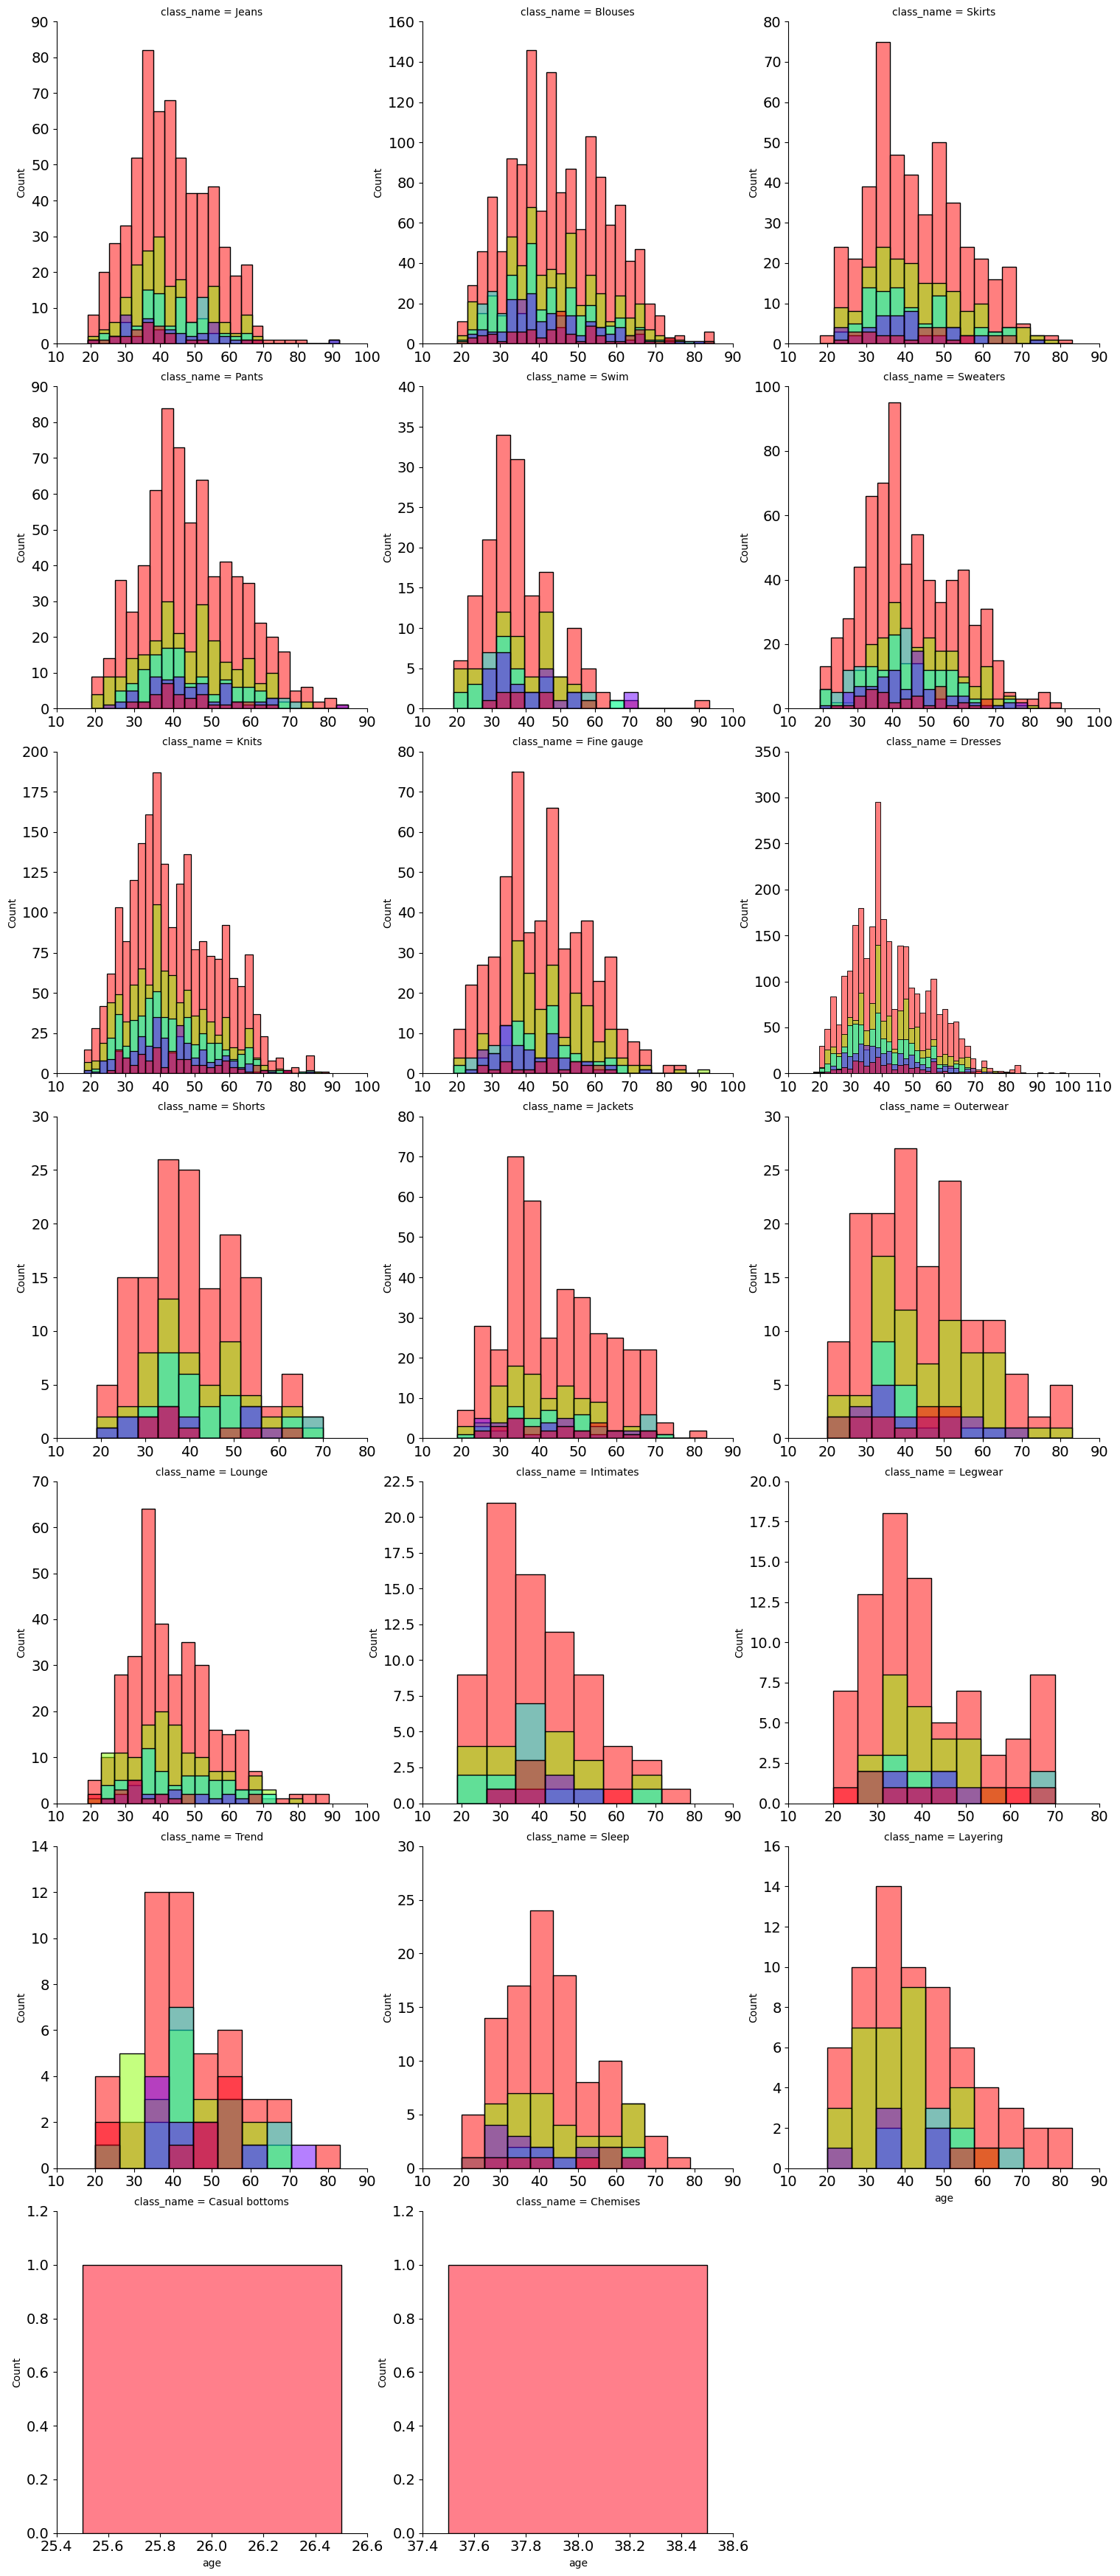

In [20]:
g = sns.FacetGrid(df, col='class_name', height=5, col_wrap=3, sharex=False,sharey=False)
g.map_dataframe(sns.histplot, x='age', hue='rating', palette='hsv_r')
g.set_xticklabels(fontsize=14)
g.set_yticklabels(fontsize=14)

## Departments sorted by age

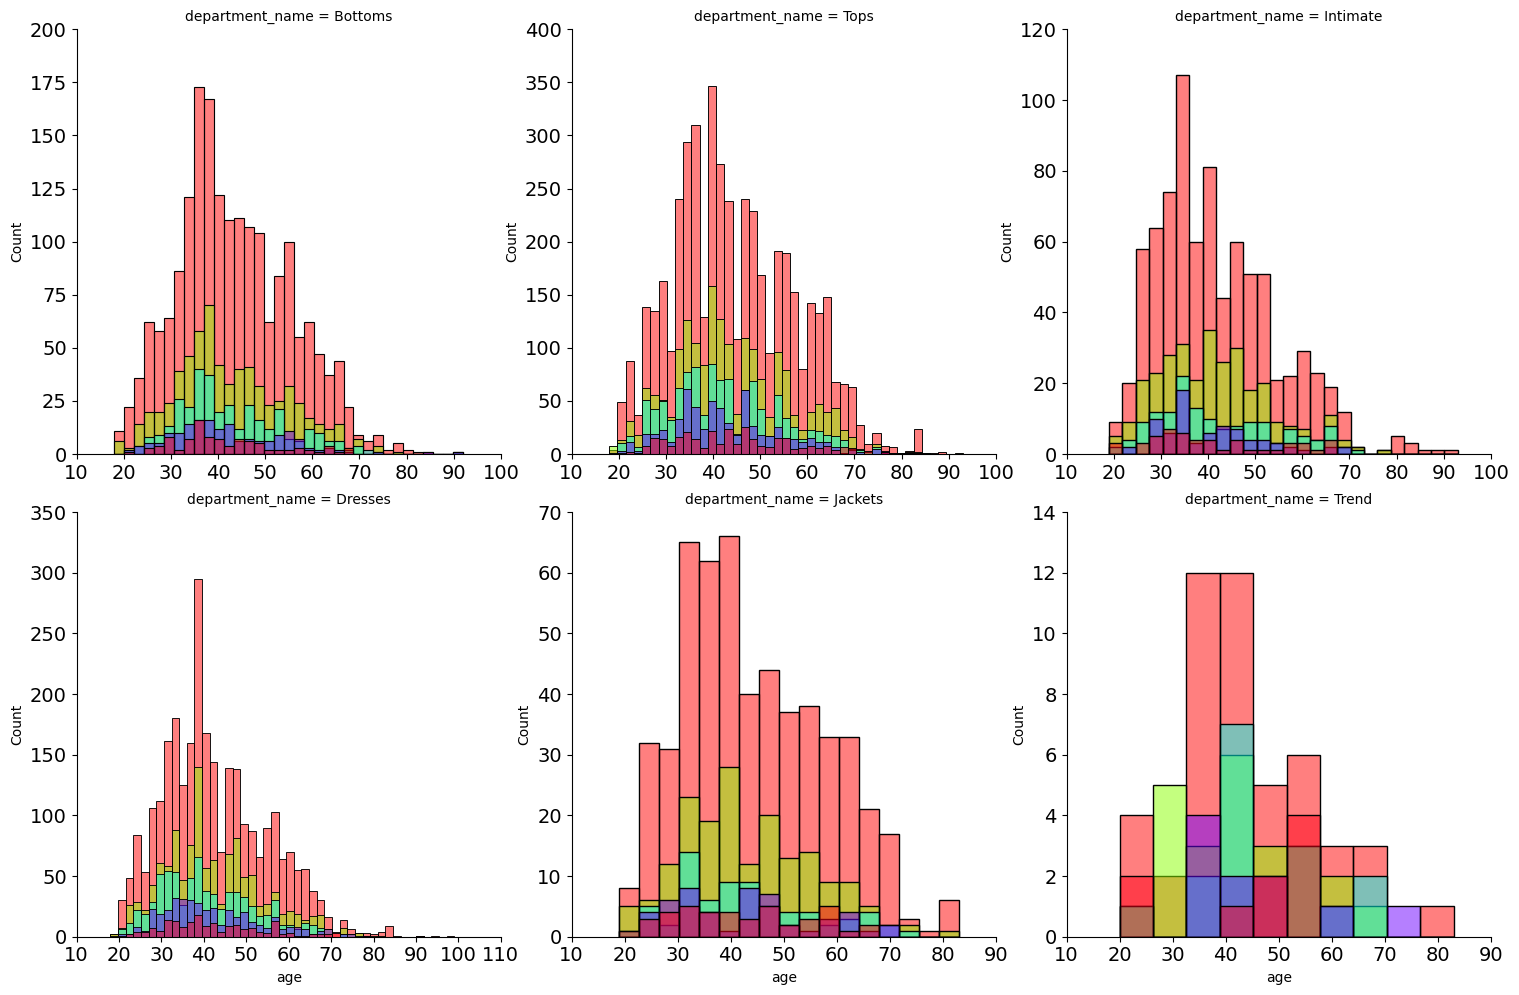

In [21]:
g = sns.FacetGrid(df, col='department_name', height=5, col_wrap=3, sharex=False,sharey=False)
g.map_dataframe(sns.histplot, x='age', hue='rating',palette='hsv_r')
g.set_xticklabels(fontsize=14)
g.set_yticklabels(fontsize=14)

## Departments recommended by age

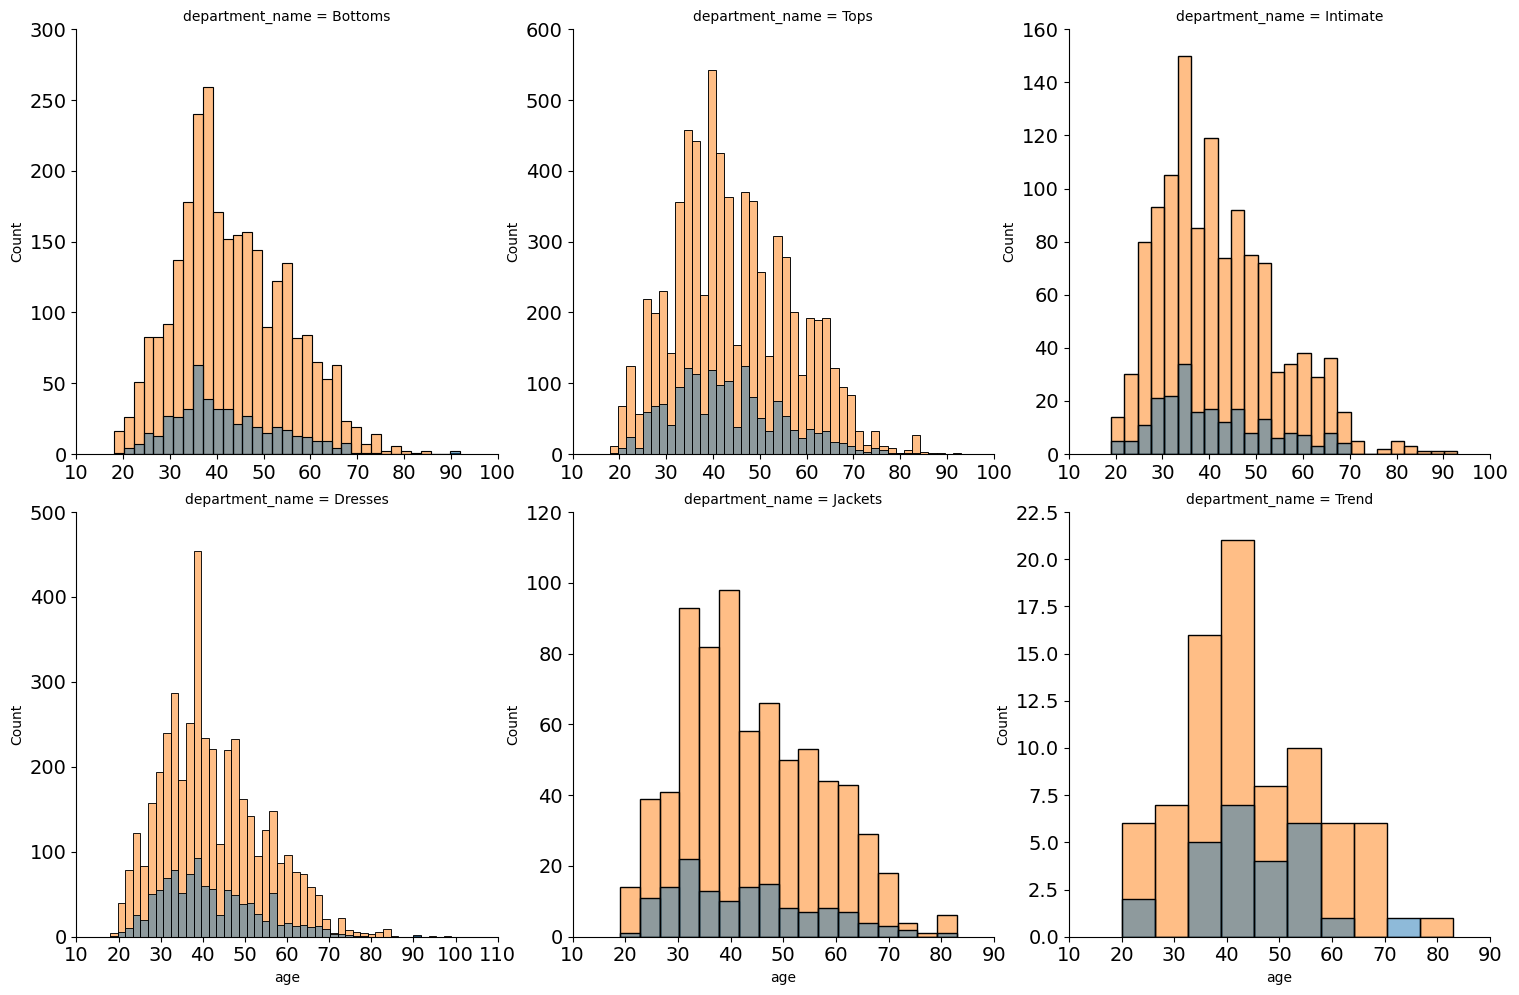

In [22]:
# color -> blue:No, beige:Yes
g = sns.FacetGrid(df, col='department_name', height=5, col_wrap=3, sharex=False,sharey=False)
g.map_dataframe(sns.histplot, x='age', hue='recommend_index ')
g.set_xticklabels(fontsize=14)
g.set_yticklabels(fontsize=14)
g.add_legend()

## Division sorted by age

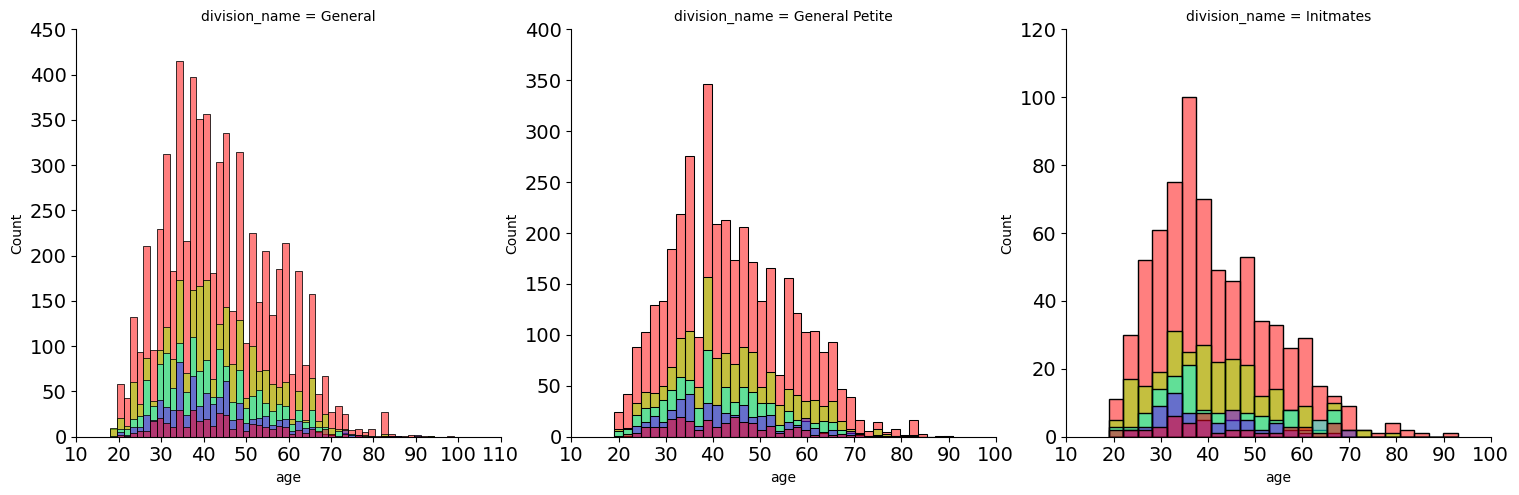

In [23]:
g = sns.FacetGrid(df, col='division_name', height=5,sharex=False,sharey=False)
g.map_dataframe(sns.histplot, x='age', hue='rating',palette='hsv_r')
g.set_xticklabels(fontsize=14)
g.set_yticklabels(fontsize=14)

## Division recommended by age

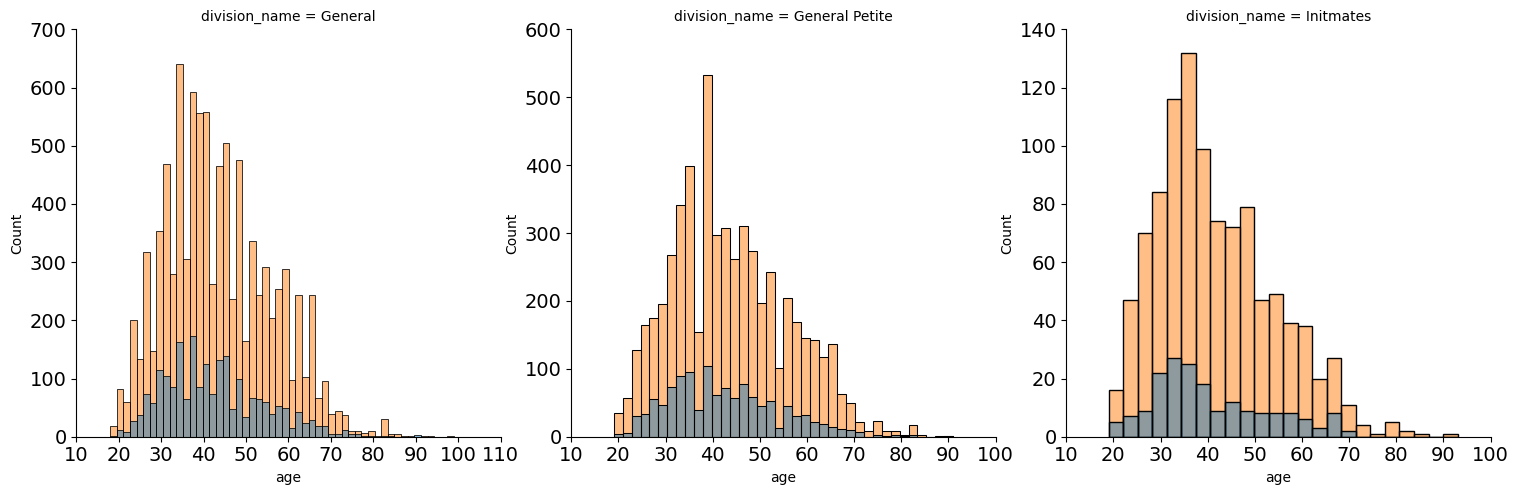

In [24]:
# color -> blue:No, beige:Yes
g = sns.FacetGrid(df, col='division_name', height=5, sharex=False,sharey=False)
g.map_dataframe(sns.histplot, x='age', hue='recommend_index ')
g.set_xticklabels(fontsize=14)
g.set_yticklabels(fontsize=14)

In [25]:
from wordcloud import WordCloud,STOPWORDS
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [26]:
#creating a separate table consisting only review Titles and review text
texto = df[['title', 'review_text']].copy()
texto.head()

,title,review_text
0,Amazing fit and wash,Like other reviewers i was hesitant to spend t...
1,Lovely and unique!,As is true of a bunch of the fall clothing pho...
2,Meh,"I so wanted this skirt to work, love the desig..."
3,Wow,Love love this! i was hesitant to buy this at ...
4,Great for bigger busts,I absolutely love the retro look of this swims...


In [27]:
#Function to remove punctuations with commas and joining multiple sentences as single
def text_clear(text):
    text = text.lower()
    text = text.replace('!','')
    text = text.replace('?','')
    text = text.replace('.','')
    text = ' '.join([word for word in text.split() if word not in (stopwords)])
    return text
print('ok')

ok


In [28]:
#calling the above function for TITLES and REVIEWS
texto['title'] = texto['title'].apply(lambda text: text_clear(text)) 
texto['review_text'] = texto['review_text'].apply(lambda text: text_clear(text))
texto.head(5)

,title,review_text
0,amazing fit wash,like reviewers hesitant spend much pair jeans ...
1,lovely unique,"true bunch fall clothing photos, colors totall..."
2,meh,"wanted skirt work, love design but, way, way l..."
3,wow,love love hesitant buy first - reviews made se...
4,great bigger busts,absolutely love retro look swimsuit first saw ...


In [29]:
# Word count function and table
def text_freq(data):
    tipo = list(data)
    words = []
    for i in tipo:
        i = list(i.split())
        for j in i:
            words.append(j.replace(' ',''))
    count = Counter(words)
    tabel = pd.DataFrame({
        'Words':count.keys(),
        'Count':count.values()
    }).sort_values('Count',ascending=False)
    return tabel

## Word frequency in the title

In [30]:
#Counting the frequency of KEY WORDS in all titles
title = text_freq(texto['title']).head(20)
display(title)

,Words,Count
10,love,1768
7,great,1756
61,dress,1533
79,cute,1386
13,beautiful,1291
48,top,1097
31,perfect,797
88,pretty,582
1,fit,564
217,nice,488


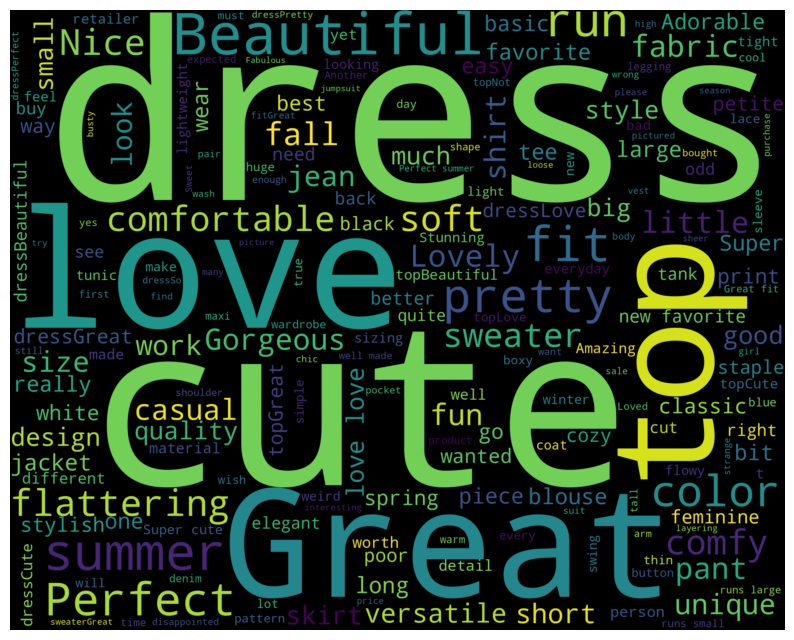

In [31]:
# Creating WORD CLOUD of the words used in TITLE
d = df['title']
text = ''.join(d)
wordcloud = WordCloud(stopwords=STOPWORDS,width=2500,
                      height=2000).generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Word frequency in comments

In [32]:
#Counting the frequency of KEY WORDS in all comments
comments = text_freq(texto['review_text']).head(20)
display(comments)

,Words,Count
356,dress,8660
69,love,7551
97,size,7167
0,like,6164
102,fit,6076
163,top,5902
158,wear,5594
103,great,4976
153,i'm,4927
16,would,4459


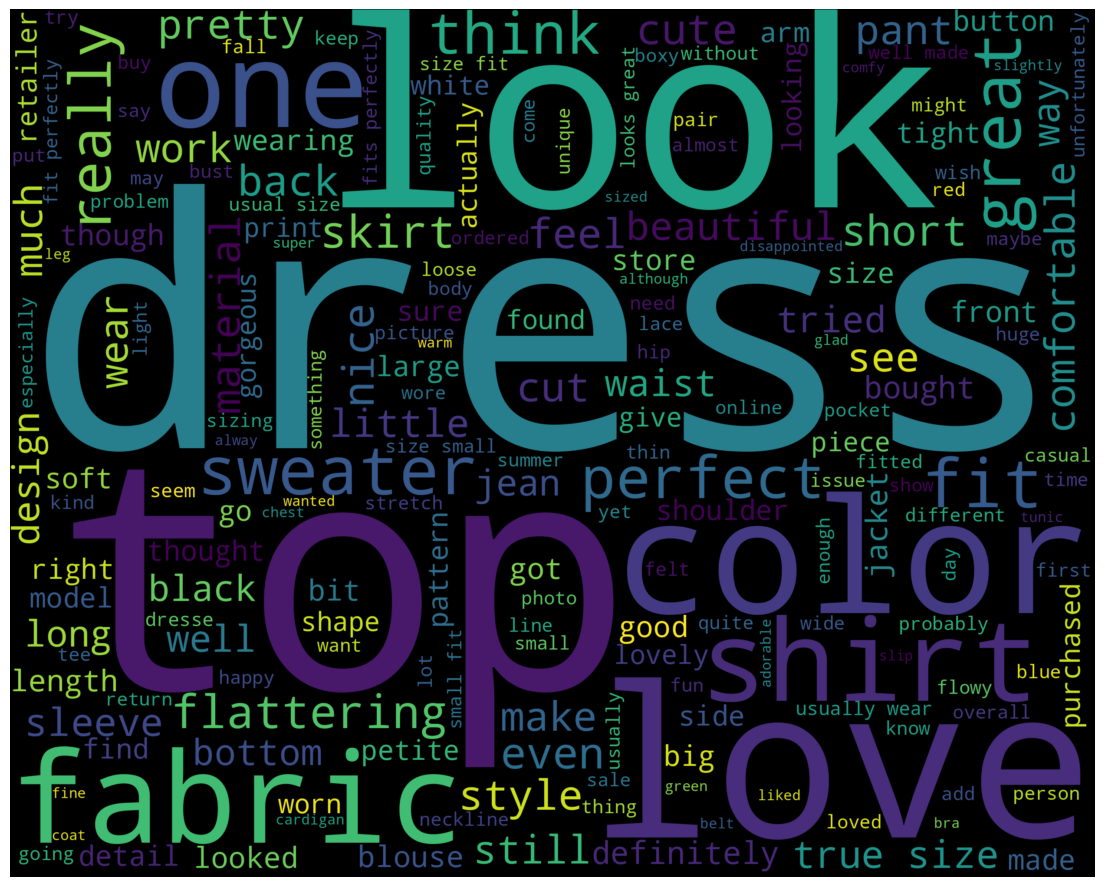

In [33]:
# word cloud
d = texto['review_text']
text = ''.join(d)
wordcloud = WordCloud(stopwords=STOPWORDS,width=2500,
                      height=2000).generate(text)
plt.figure(figsize=(14,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [63]:
df['length'] = df['review_text'].apply(len)
df.head(5)


,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index,length
0,40,General,Bottoms,Jeans,1028,Amazing fit and wash,Like other reviewers i was hesitant to spend t...,0,5,1,225
1,62,General Petite,Tops,Blouses,850,Lovely and unique!,As is true of a bunch of the fall clothing pho...,12,5,1,499
2,47,General Petite,Bottoms,Skirts,993,Meh,"I so wanted this skirt to work, love the desig...",3,1,0,166
3,45,General Petite,Bottoms,Pants,1068,Wow,Love love this! i was hesitant to buy this at ...,0,5,1,454
4,37,Initmates,Intimate,Swim,24,Great for bigger busts,I absolutely love the retro look of this swims...,0,5,1,500


In [64]:
df['recommend_index ']

0        1
1        1
2        0
3        1
4        1
        ..
23478    0
23481    1
23482    1
23483    1
23484    1
Name: recommend_index , Length: 19662, dtype: int64

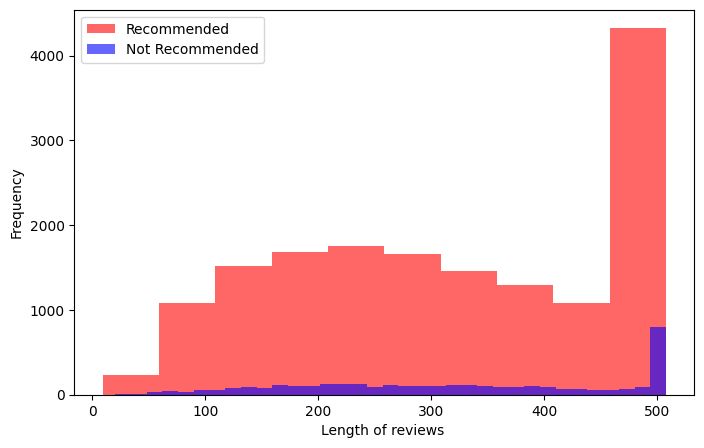

In [66]:
plt.figure(figsize=(8, 5))
df[df['recommend_index '] == 1].length.plot(kind='hist', color='red', label='Recommended', alpha=0.6)
df[df['recommend_index '] == 0].length.plot(bins=35, kind='hist', color='blue', label='Not Recommended', alpha=0.6)
plt.legend()
plt.xlabel("Length of reviews ");

# **✅ 3. MACHINE LEARNING MODELS**

In [34]:
df

,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index
0,40,General,Bottoms,Jeans,1028,Amazing fit and wash,Like other reviewers i was hesitant to spend t...,0,5,1
1,62,General Petite,Tops,Blouses,850,Lovely and unique!,As is true of a bunch of the fall clothing pho...,12,5,1
2,47,General Petite,Bottoms,Skirts,993,Meh,"I so wanted this skirt to work, love the desig...",3,1,0
3,45,General Petite,Bottoms,Pants,1068,Wow,Love love this! i was hesitant to buy this at ...,0,5,1
4,37,Initmates,Intimate,Swim,24,Great for bigger busts,I absolutely love the retro look of this swims...,0,5,1
...,...,...,...,...,...,...,...,...,...,...
23478,26,General,Tops,Knits,883,I like the feel of the fabric but...,It feels soft and like a good quality. however...,0,3,0
23481,44,General Petite,Dresses,Dresses,1081,Love it!,I oot this dress in the blue. it fits great--h...,0,5,1
23482,39,General,Dresses,Dresses,1110,Great piece,I was very patient with this dress. i was wait...,1,5,1
23483,29,General Petite,Tops,Knits,862,So soft and flattering,"The deep v doesn't gape, and flatters the neck...",0,5,1


## **The 1 Snippet MODEL**

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Load the dataset
dfnew = df

# Select the relevant features
dfnew= dfnew[["review_text", "rating"]]

# Map the rating to a binary label
dfnew["Label"] = dfnew["rating"].apply(lambda x: 1 if x > 3 else 0)
dfnew = dfnew.drop("rating", axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dfnew["review_text"], dfnew["Label"], test_size=0.2, random_state=42)

# Convert the text data into a bag-of-words representation
vectorizer = CountVectorizer(stop_words="english")
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train a Naive Bayes classifier on the training data
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Test the classifier on the testing data
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

<ipython-input-35-e26f89f9607e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnew["Label"] = dfnew["rating"].apply(lambda x: 1 if x > 3 else 0)


Accuracy: 86.96%


## **Testing the Model Accuracy for:**
*   MultinomialNB
*   Bernoulli NB
*   LR
*  SVM
*   KNN
*   Decision tree





### **1. Multinomial NB**

In [37]:
# Multinomial NB
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
classifierMNB = MultinomialNB()
classifierMNB.fit(X_train, y_train)
# Predicting the Test set results
y_predMNB = classifierMNB.predict(X_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cmMNB = confusion_matrix(y_test, y_predMNB)
print ("Confusion Matrix MNB:\n",cmMNB)
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
MNBscore1 = accuracy_score(y_test,y_predMNB)
MNBscore2 = precision_score(y_test,y_predMNB)
MNBscore3= recall_score(y_test,y_predMNB)
print("\n")
print("Accuracy MNB is ",round(MNBscore1*100,2),"%")
print("Precision MNB is ",round(MNBscore2,2))
print("Recall MNB is ",round(MNBscore3,2))

#F-Score
from sklearn.metrics import f1_score
FMNB=f1_score(y_test, y_predMNB)
print ("F1 Score MNB:", FMNB)

Confusion Matrix MNB:
 [[ 615  311]
 [ 202 2805]]


Accuracy MNB is  86.96 %
Precision MNB is  0.9
Recall MNB is  0.93
F1 Score MNB: 0.9162175404213619


### **2. Bernoulli NB**

In [50]:
# Bernoulli NB

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import BernoulliNB
classifierNB = BernoulliNB()
classifierNB.fit(X_train, y_train)

# Predicting the Test set results
y_predNB = classifierNB.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cmNB = confusion_matrix(y_test, y_predNB)
print ("Confusion Matrix NB:\n",cmNB)

# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
NBscore1 = accuracy_score(y_test,y_predNB)
NBscore2 = precision_score(y_test,y_predNB)
NBscore3= recall_score(y_test,y_predNB)
print("\n")
print("Accuracy NB is ",round(NBscore1*100,2),"%")
print("Precision NB is ",round(NBscore2,2))
print("Recall NB is ",round(NBscore3,2))

#F-Score
from sklearn.metrics import f1_score
FNB=f1_score(y_test, y_predNB)
print ("F1 Score NB:", FNB)

Confusion Matrix NB:
 [[ 571  355]
 [ 198 2809]]


Accuracy NB is  85.94 %
Precision NB is  0.89
Recall NB is  0.93
F1 Score NB: 0.9103872954140334


### **3. Logistic Regression**

In [39]:
# Logistic Regression

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifierLR= LogisticRegression()
classifierLR.fit(X_train, y_train)

# Predicting the Test set results
y_predLR = classifierLR.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cmLR = confusion_matrix(y_test, y_predLR)
print ("Confusion Matrix LR:\n",cmLR)

# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
LRscore1 = accuracy_score(y_test,y_predLR)
LRscore2 = precision_score(y_test,y_predLR)
LRscore3= recall_score(y_test,y_predLR)
print("\n")
print("Accuracy LR is ",round(LRscore1*100,2),"%")
print("Precision LR is ",round(LRscore2,2))
print("Recall LR is ",round(LRscore3,2))

#F-Score
from sklearn.metrics import f1_score
FLR=f1_score(y_test, y_predLR)
print ("F1 LR Score:", FLR)

Confusion Matrix LR:
 [[ 571  355]
 [ 173 2834]]


Accuracy LR is  86.58 %
Precision LR is  0.89
Recall LR is  0.94
F1 LR Score: 0.9147837314396384


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### **4. SVM**

In [40]:
from sklearn import svm
classifierSVM = svm.SVC()
classifierSVM.fit(X_train, y_train)

# Predicting the Test set results
y_predSVM = classifierSVM.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cmSVM = confusion_matrix(y_test, y_predSVM)
print ("Confusion Matrix SVM:\n",cmSVM)

# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
SVMscore1 = accuracy_score(y_test,y_predSVM)
SVMscore2 = precision_score(y_test,y_predSVM)
SVMscore3= recall_score(y_test,y_predSVM)
print("\n")
print("Accuracy SVM is ",round(SVMscore1*100,2),"%")
print("Precision SVM is ",round(SVMscore2,2))
print("Recall SVM is ",round(SVMscore3,2))

#F score
from sklearn.metrics import f1_score
FSVM=f1_score(y_test, y_predSVM)
print ("F1 score for SVM: ", FSVM)

Confusion Matrix SVM:
 [[ 513  413]
 [ 105 2902]]


Accuracy SVM is  86.83 %
Precision SVM is  0.88
Recall SVM is  0.97
F1 score for SVM:  0.9180639038279026


### **5. KNN**

In [41]:
from sklearn.neighbors import KNeighborsClassifier
classifierKNN = KNeighborsClassifier(n_neighbors=7)
classifierKNN.fit(X_train, y_train)

# Predicting the Test set results
y_predKNN = classifierKNN.predict(X_test)

# Making the Confusion Matrix
cmKNN = confusion_matrix(y_test, y_predKNN)
print ("Confusion Matrix KNN:\n",cmKNN)

# Accuracy, Precision and Recall
KNNscore1 = accuracy_score(y_test,y_predKNN)
KNNscore2 = precision_score(y_test,y_predKNN)
KNNscore3= recall_score(y_test,y_predKNN)
print("\n")
print("Accuracy KNN is ",round(KNNscore1*100,2),"%")
print("Precision KNN is ",round(KNNscore2,2))
print("Recal KNNl is ",round(KNNscore3,2))

#F Score
KNNF=f1_score(y_test, y_predKNN)
print ("F score KNN: ", KNNF)

Confusion Matrix KNN:
 [[  86  840]
 [  59 2948]]


Accuracy KNN is  77.14 %
Precision KNN is  0.78
Recal KNNl is  0.98
F score KNN:  0.8676968359087565


### **6. Decision Tree**

In [42]:
from sklearn.tree import DecisionTreeClassifier
# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [43]:
y_pred_gini = clf_gini.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.7788


In [45]:
from sklearn.metrics import f1_score
F=f1_score(y_test, y_pred_gini)
print (F)

0.8715298287064382


### **7. Random Forest**

In [46]:
from sklearn.ensemble import RandomForestClassifier
classifierRF = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
classifierRF.fit(X_train,y_train)

# Predicting the test set results
y_predRF = classifierRF.predict(X_test)

# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
cmRF = confusion_matrix(y_test, y_predRF)

RFscore1 = accuracy_score(y_test,y_predRF)
RFscore2 = precision_score(y_test,y_predRF)
RFscore3= recall_score(y_test,y_predRF)
print("\n")
print("Accuracy RF is ",round(KNNscore1*100,2),"%")
print("Precision RF is ",round(KNNscore2,2))
print("Recal RF is ",round(RFscore3,2))

from sklearn.metrics import f1_score
FRF=f1_score(y_test, y_predRF)
print ("F score RF:",FRF)



Accuracy RF is  77.14 %
Precision RF is  0.78
Recal RF is  0.99
F score RF: 0.9013998782714546
